In [23]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models,Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization,Activation
import tensorflow.keras.optimizers as optimizers
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print(tf.config.experimental.list_physical_devices())
print(tf.test.is_built_with_cuda())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
True


In [3]:
data = datasets.cifar10.load_data()

In [237]:
(x_train , y_train) , (x_test , y_test) = data
print("training set:",len(x_train))
print("testing set:",len(x_test))

training set: 50000
testing set: 10000


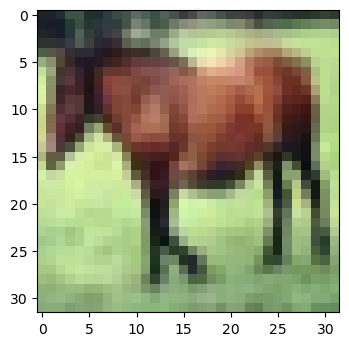

In [238]:
#sample plot

plt.figure(figsize=(8,4),dpi=100)
plt.imshow(x_train[7])
plt.show()

In [239]:
#pre process

y_train = to_categorical(y_train)
x_train = x_train/255

In [7]:
# model the network

model_ANN = Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(3000,activation="relu"),
    Dense(1000,activation="relu"),
    Dense(10,activation="sigmoid")
])

model_ANN.compile(optimizer="SGD",loss="categorical_crossentropy",metrics=["accuracy"])

In [8]:
model_CNN = Sequential([
    #cnn
    Conv2D(filters=32,activation="relu",kernel_size=(3,3),input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(filters=64,activation="relu",kernel_size=(3,3)),
    MaxPooling2D((2,2)), 

    
    #dense
    Flatten(),
    Dense(64,activation="relu"),
    Dense(10,activation="softmax")
])

model_CNN.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"]) # use "sparse_categorical_crossentropy" if you have not one hot encoded

In [9]:
model_CNN2 = Sequential([
    #cnn
    Conv2D(filters=64,kernel_size=(3,3),input_shape=(32,32,3)),
    Activation("relu"),
    Dropout(0.2),
    BatchNormalization(),
    
    Conv2D(filters=128,kernel_size=(3,3)),
    Activation("relu"),
    Dropout(0.2),
    BatchNormalization(),
    MaxPooling2D((2,2)), 
    
    Conv2D(filters=256,kernel_size=(3,3)),
    Activation("relu"),
    Dropout(0.2),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    
    Conv2D(filters=512,kernel_size=(3,3)),
    Activation("relu"),
    Dropout(0.2),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    
    #dense
    Flatten(),
    Dense(64,activation="relu"),
    Dense(10,activation="softmax")
])

model_CNN2.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"]) # use "sparse_categorical_crossentropy" if you have not one hot encoded

In [227]:
def CIFAR_model():
    model = Sequential()
    
    #cnn
    model.add(Conv2D(input_shape=(32,32,3),filters=64,kernel_size=(3,3),padding="same", activation="relu",kernel_initializer='he_uniform'))
    model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu",kernel_initializer='he_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu",kernel_initializer='he_uniform'))
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu",kernel_initializer='he_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu",kernel_initializer='he_uniform'))
    model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu",kernel_initializer='he_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    
    #ann
    model.add(Flatten())
    model.add(Dense(units=200,activation="relu",kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(units=10, activation="softmax"))
    
    return model

In [150]:
history = model_ANN.fit(x_train,y_train,epochs=1)

1563/1563 [==============================] - 8s 5ms/step - loss: 1.5452 - accuracy: 0.4566


In [15]:
history = model_CNN.fit(x_train,y_train,epochs=1)

1563/1563 [==============================] - 6s 4ms/step - loss: 1.0787 - accuracy: 0.6231


In [16]:
history = model_CNN2.fit(x_train,y_train,epochs=1)

1563/1563 [==============================] - 13s 9ms/step - loss: 0.9733 - accuracy: 0.6611


In [228]:
model = CIFAR_model()

opt = optimizers.SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])

In [229]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_130 (Conv2D)          (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 32, 32, 32)        18464     
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_132 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_133 (Conv2D)          (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 8, 8, 64)        

In [230]:
history = model.fit(x_train,y_train,epochs=100,batch_size=64)

Epoch 1/100
782/782 [==============================] - 12s 15ms/step - loss: 2.0444 - accuracy: 0.2428
Epoch 2/100
782/782 [==============================] - 11s 15ms/step - loss: 1.5075 - accuracy: 0.4500
Epoch 3/100
782/782 [==============================] - 12s 15ms/step - loss: 1.2431 - accuracy: 0.5562
Epoch 4/100
782/782 [==============================] - 11s 15ms/step - loss: 1.0687 - accuracy: 0.6196
Epoch 5/100
782/782 [==============================] - 12s 15ms/step - loss: 0.9440 - accuracy: 0.6658
Epoch 6/100
782/782 [==============================] - 12s 15ms/step - loss: 0.8631 - accuracy: 0.6946
Epoch 7/100
782/782 [==============================] - 12s 15ms/step - loss: 0.7997 - accuracy: 0.7194TA: 0s - loss: 0.7995 - 
Epoch 8/100
782/782 [==============================] - 11s 15ms/step - loss: 0.7494 - accuracy: 0.7373
Epoch 9/100
782/782 [==============================] - 12s 15ms/step - loss: 0.7089 - accuracy: 0.7516
Epoch 10/100
782/782 [===========================

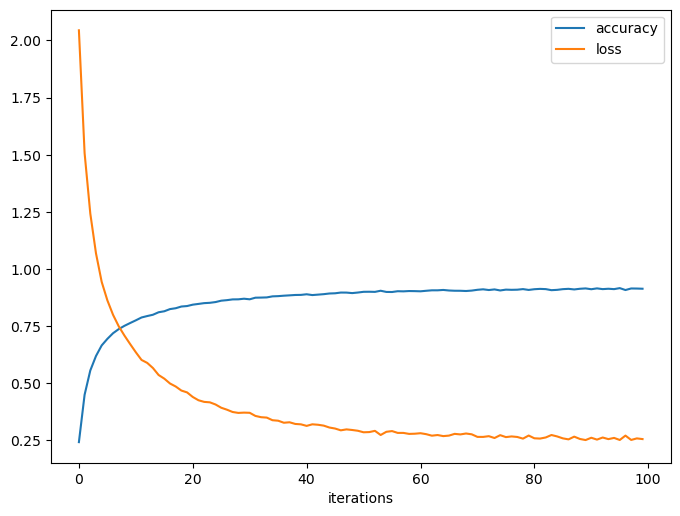

In [231]:
plt.figure(figsize=(8,6),dpi=100)
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history['loss'],label="loss")
plt.xlabel("iterations")
plt.legend()
plt.show()

In [242]:
predictions = np.argmax(model.predict(x_test/255),axis=1)

In [243]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

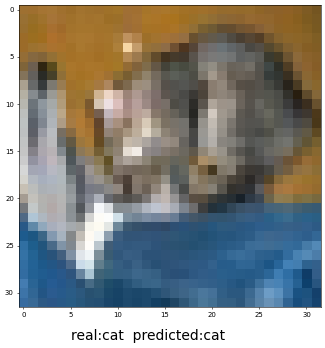

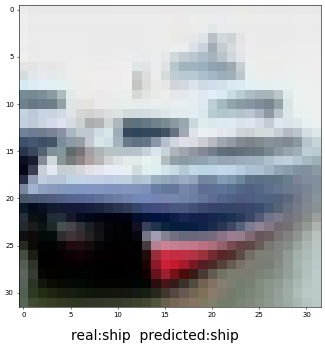

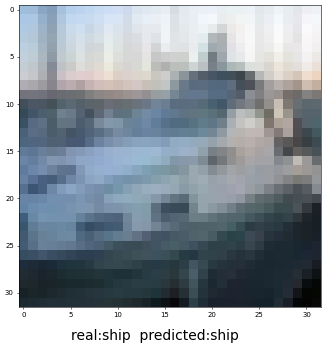

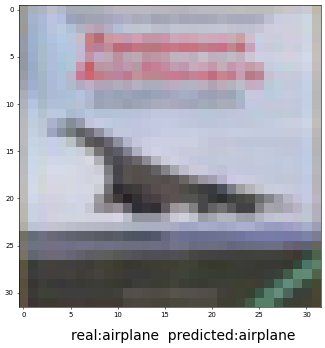

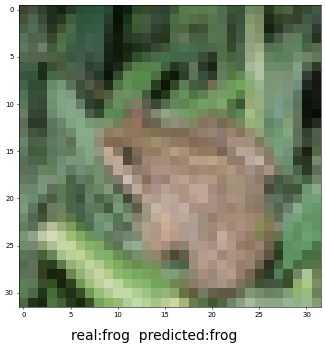

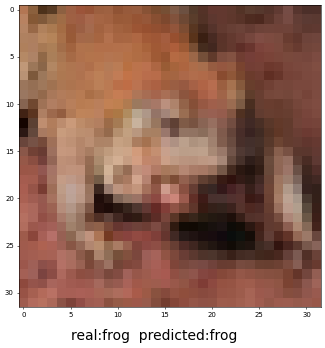

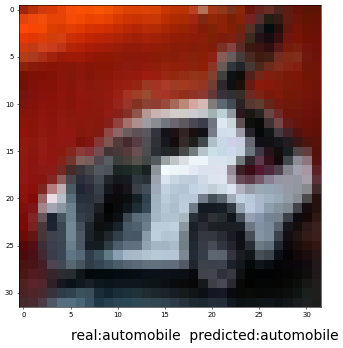

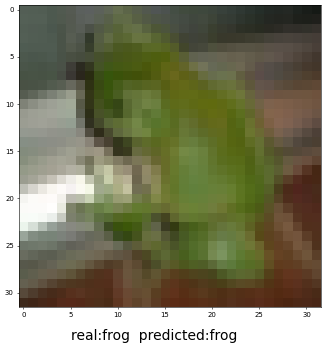

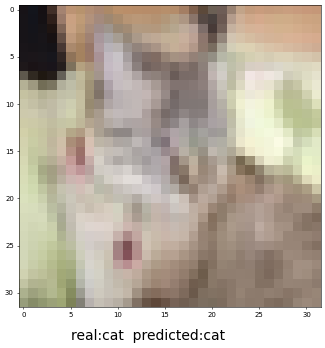

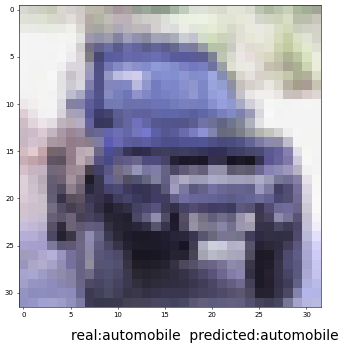

In [244]:
for i in range(0,10):
    plt.figure(figsize=(10,8),dpi=50)
    plt.imshow(x_test[i])
    plt.text(5,35,"real:"+classes[y_test[i][0]]+"  predicted:"+classes[predictions[i]],fontsize=20)

In [181]:
y_test_sample = y_test.reshape(10000)

In [235]:
def accuracy():
    count = 0
    for i in range(0,len(predictions)):
        if(predictions[i]==y_test_sample[i]):
            count+=1
    return count/len(predictions)*100

In [254]:
print("accuracy:",accuracy(),"%")

accuracy: 80.31 %


In [255]:
model.save("CIFAR-10.h5")